In [23]:
import numpy as np
import theano
from theano import tensor as T
import lasagne
from lasagne.layers import *
from lasagne.nonlinearities import *
from scipy.misc import factorial

In [7]:
def _remove_trainable(layer):
    for key in layer.params:
        layer.params[key].remove('trainable')

In [389]:
def get_net(k):
    # k = num classes
    l_in = InputLayer((None, 10))
    l_sigm = DenseLayer(l_in, num_units=1, nonlinearity=sigmoid)
    l_copy = DenseLayer(l_sigm, num_units=k, nonlinearity=linear)
    l_copy.W.set_value( np.ones((1,k)).astype("float32") )
    _remove_trainable(l_copy)
    c = np.asarray([[(i) for i in range(0, k)]], dtype="float32")
    #print np.fa
    #l_binom_coef = ExpressionLayer(l_copy, lambda x: (factorial(k) / ( factorial(c)*factorial(k - c) )) * x )
    l_logf = ExpressionLayer( l_copy, lambda px: T.exp( (c*T.log(px)) + ((k-c)*T.log(1.-px)) ) )
    #l_explogf = ExpressionLayer(l_logf, lambda x: T.exp(x))
    binom_coef = scipy.special.binom(k, c)
    l_logf = ExpressionLayer(l_logf, lambda px: binom_coef*px)
    print c
    return l_copy, l_logf

In [390]:
k = 5
l_copy, l_logf = get_net(k)

[[ 0.  1.  2.  3.  4.]]


In [391]:
for layer in get_all_layers(l_logf):
    print layer, layer.output_shape

<lasagne.layers.input.InputLayer object at 0x11537ab90> (None, 10)
<lasagne.layers.dense.DenseLayer object at 0x11537afd0> (None, 1)
<lasagne.layers.dense.DenseLayer object at 0x11537ae50> (None, 5)
<lasagne.layers.special.ExpressionLayer object at 0x11537d1d0> (None, 5)
<lasagne.layers.special.ExpressionLayer object at 0x11537d390> (None, 5)


In [392]:
X = T.fmatrix('X')
net_out = get_output(l_logf, X)
p_out = get_output(l_copy, X)
xfake = np.random.normal(0,1,size=(1,10))
pdist = net_out.eval({X: xfake.astype("float32")})
print pdist, np.sum(pdist)
p = p_out.eval({X: xfake.astype("float32")})
print p

[[ 0.1204989   0.31743908  0.3345012   0.1762402   0.04642825]] 0.995107627034
[[ 0.34506738  0.34506738  0.34506738  0.34506738  0.34506738]]


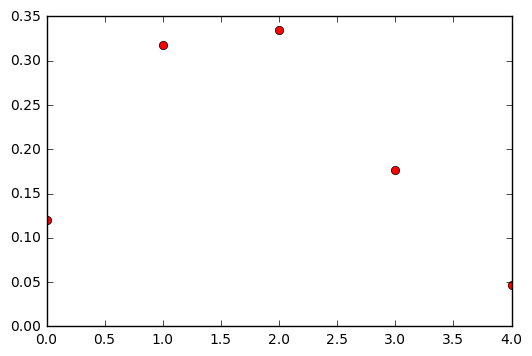

In [393]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pdist[0], "ro")

In [377]:
px = 0.21374255158533834
px

0.21374255158533834

In [388]:
c = np.asarray([[(i) for i in range(0, k)]], dtype="float32")
k = 5
binom_coef = scipy.special.binom(k, c)
#binom_coef = 1
tmp = T.exp( (c*T.log(px)) + ((k-c)*T.log(1.-px)) ).eval()
#tmp = (px**c) * ((1-px)**(k-c))
tmp = tmp * binom_coef
#tmp = tmp * binom_coef
print tmp
print np.sum(tmp)

[[ 0.30048574  0.4084323   0.22206305  0.06036741  0.00820538]]
0.999553876657


In [349]:
binom_coef

array([[  5.,  10.,  10.,   5.,   1.]], dtype=float32)

In [358]:
import scipy
?scipy.special.binom(k, c)

In [372]:
# x, n, p
np.sum(scipy.stats.binom.pmf(c, k, p))

0.99955387471228974

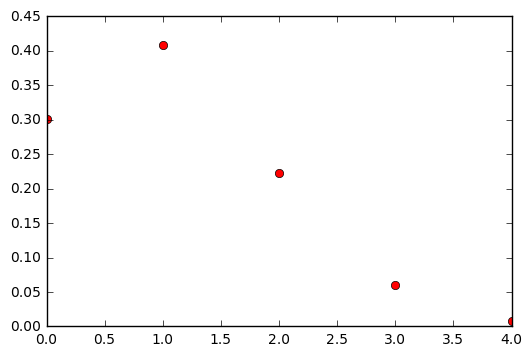

In [374]:
plt.plot(scipy.stats.binom.pmf(c, k, p)[0],"ro")

In [369]:
c

array([[ 1.,  2.,  3.,  4.,  5.]], dtype=float32)

-----

In [29]:
c = np.asarray([[(i+1) for i in range(0, k)]], dtype="float32")
c

array([[ 1.,  2.,  3.,  4.,  5.]], dtype=float32)

In [33]:
factorial(k) / ( factorial(c)*factorial(k - c) )

array([[  5.,  10.,  10.,   5.,   1.]], dtype=float32)

In [32]:
factorial(c)

array([[   1.,    2.,    6.,   24.,  120.]], dtype=float32)

In [34]:
?T.exp

In [184]:
?T.log

In [185]:
T.log(0.5).eval()

array(-0.6931471824645996, dtype=float32)